# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [267]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
complete_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [268]:
# Checking the number of mice.
mouse_count = len(complete_data_df["Mouse ID"].unique())
mouse_count

249

In [269]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_df = complete_data_df[complete_data_df.duplicated(["Mouse ID","Timepoint"], keep=False )]
dupes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [270]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_index_df = complete_data_df.set_index("Mouse ID")
mouse_index_df

mouse_index_df.loc[['g989']]
#entire 'g989' data has 13 rows

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [271]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = mouse_index_df.drop(["g989"])
clean_data_df
#clean dataset has 13 less rows than original dataset

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [272]:
#reset index on clean data set so that mouse ID is now a column in the dataframe
clean_data_df = clean_data_df.reset_index()
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df['Mouse ID'].unique())

248

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [50]:
#mean tumor volume
mean_tumor = clean_data_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
mean_tumor

/var/folders/ms/5785_4z16zg_ss0mgzt1jx6c0000gq/T/ipykernel_19412/4081359829.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor = clean_data_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [51]:
#Median Tumor volume
median_tumor = clean_data_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
median_tumor

/var/folders/ms/5785_4z16zg_ss0mgzt1jx6c0000gq/T/ipykernel_19412/1063340761.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor = clean_data_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [52]:
#Tumor varience
var_tumor = clean_data_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
var_tumor

/var/folders/ms/5785_4z16zg_ss0mgzt1jx6c0000gq/T/ipykernel_19412/599155977.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var_tumor = clean_data_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [53]:
#tumor standard deviation
std_dev_tumor = clean_data_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
std_dev_tumor

/var/folders/ms/5785_4z16zg_ss0mgzt1jx6c0000gq/T/ipykernel_19412/1083183556.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_dev_tumor = clean_data_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [54]:
#tumor standard error
sem_tumor = clean_data_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
sem_tumor

/var/folders/ms/5785_4z16zg_ss0mgzt1jx6c0000gq/T/ipykernel_19412/3187246649.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sem_tumor = clean_data_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [55]:
#Summary dataframe with above statistics
tumor_summary_df = pd.DataFrame({
    "Mean Tumor Volume" : mean_tumor,
    "Median Tumor Volume" : median_tumor,
    "Tumor Volume Variance" : var_tumor,
    "Tumor Volume Std. Dev." : std_dev_tumor,
    "Tumor Volume Std. Err." : sem_tumor
})
tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_summary_df = clean_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([
    'mean', 'median', 'var', 'std', 'sem'])
agg_tumor_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

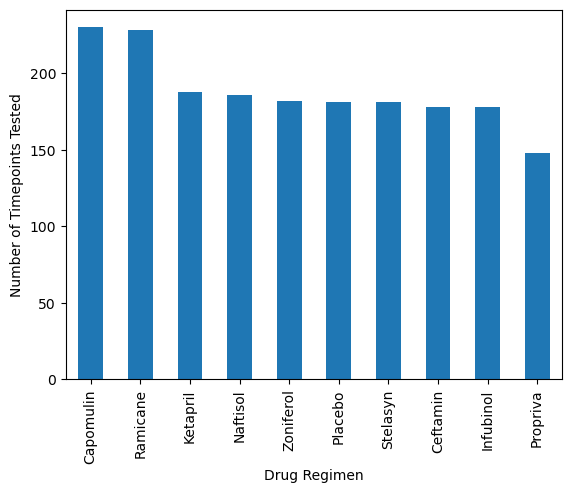

In [275]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#generate series that returns drug as the key and the number of timepoints tested as the values
panda_bar = clean_data_df.groupby(['Drug Regimen'])['Timepoint'].count()
#plot and sort values highest to lowest
panda_bar.sort_values(ascending=False).plot.bar(ylabel="Number of Timepoints Tested")
plt.show()

Text(0, 0.5, 'Number of Timepoints Tested')

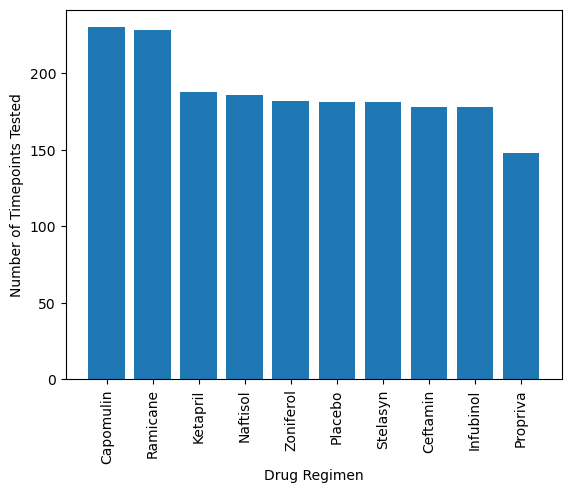

In [276]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#sort series generated above by highest to lowest timepoints tested
sorted_drugs = panda_bar.sort_values(ascending=False)
#set x-axis by selecting the "keys" in the sorted drugs series
#Set y values by selecting the "values" in the sorted drugs series
plt.bar(list(sorted_drugs.keys()), list(sorted_drugs.values))
#Rotate the x-axis labels so they are vertical
plt.xticks(rotation=90)
#Add x and y axis labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints Tested")

<Axes: ylabel='Sex'>

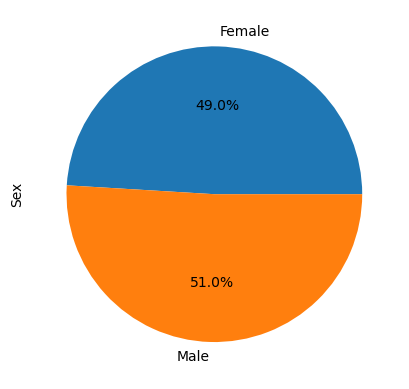

In [277]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_dist_pand = clean_data_df.groupby(['Sex'])['Sex'].count()

sex_dist_pand.plot.pie(autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

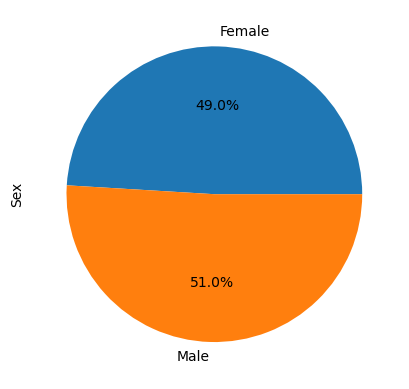

In [278]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Generate labels
labels=list(sex_dist_pand.keys())
#plot pie chart using pyplot
plt.pie(sex_dist_pand, labels=labels, autopct="%1.1f%%")
#create label for entire chart
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [279]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#turn result into dataframe in order to merge with original dataset
mice_max_timepoint_df = pd.DataFrame(clean_data_df.groupby(['Mouse ID'])['Timepoint'].max())
#reset index
mice_max_timepoint_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_max_df = pd.merge(mice_max_timepoint_df, clean_data_df, on=['Mouse ID', 'Timepoint'])
tumor_volume_max_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [280]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_cap = []
vol_ram = []
vol_inf = []
vol_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
#loop through each row in tumor volume dataframe, search for instances of each drug 
#by referencing above treatments list
#append tumor volume to blank list created above according to drug being searched
for i in tumor_volume_max_df.index:
    if tumor_volume_max_df['Drug Regimen'][i] == treatments_list[0]:
        vol_cap.append(tumor_volume_max_df["Tumor Volume (mm3)"][i])
    if tumor_volume_max_df['Drug Regimen'][i] == treatments_list[1]:
        vol_ram.append(tumor_volume_max_df["Tumor Volume (mm3)"][i])
    if tumor_volume_max_df['Drug Regimen'][i] == treatments_list[2]:
        vol_inf.append(tumor_volume_max_df["Tumor Volume (mm3)"][i])
    if tumor_volume_max_df['Drug Regimen'][i] == treatments_list[3]:
        vol_cef.append(tumor_volume_max_df["Tumor Volume (mm3)"][i])
            

# Create dataframe of the four drugs and their end tumor volumes
drug_tumor_vol_df = pd.DataFrame({
    "Capomulin" : vol_cap,
    "Ramicane" : vol_ram,
    "Infubinol" : vol_inf,
    "Ceftamin" : vol_cef,
})

# Determine outliers using upper and lower bounds
    #perform quartile calculations using Pandas
quartiles = drug_tumor_vol_df.quantile([.25,.5,.75])
#create empty lists of outliers
outlier_cap = []
outlier_ram = []
outlier_inf = []
outlier_cef = []



In [281]:
drug_tumor_vol_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [282]:
#Capomulin Outliers
# set upper and lower quartile
lowerq_cap = quartiles['Capomulin'][.25]
upperq_cap = quartiles['Capomulin'][.75]
#calculate IQR
iqr_cap = upperq_cap - lowerq_cap
#Calculate upper and lower bounds
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

#Ramicane Outliers
# set upper and lower quartile
lowerq_ram = quartiles['Ramicane'][.25]
upperq_ram = quartiles['Ramicane'][.75]
#calculate IQR
iqr_ram = upperq_ram - lowerq_ram
#Calculate upper and lower bounds
lower_bound_ram = lowerq_ram - (1.5*iqr_cap)
upper_bound_ram = upperq_ram + (1.5*iqr_cap)

#Infubinol outliers
# set upper and lower quartile
lowerq_inf = quartiles['Infubinol'][.25]
upperq_inf = quartiles['Infubinol'][.75]
#calculate IQR
iqr_inf = upperq_inf - lowerq_inf
#Calculate upper and lower bounds
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

#Ceftamin outliers
# set upper and lower quartile
lowerq_cef = quartiles['Ceftamin'][.25]
upperq_cef = quartiles['Ceftamin'][.75]
#calculate IQR
iqr_cef = upperq_cef - lowerq_cef
#Calculate upper and lower bounds
lower_bound_cef = lowerq_cef - (1.5*iqr_inf)
upper_bound_cef = upperq_cef + (1.5*iqr_inf)

#print results
outliers_df = pd.DataFrame({'Drug': treatments_list,
                         'Lower Quartile':[lowerq_cap, lowerq_ram, lowerq_inf, lowerq_cef],
                         'Upper Quartile':[upperq_cap, upperq_ram, upperq_inf, upperq_cef],
                         'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                        'Upper Bound': [upper_bound_cap, upper_bound_ram, upper_bound_inf, upper_bound_cef],
                        'Lower Bound': [lower_bound_cap, lower_bound_ram, lower_bound_inf, lower_bound_cef],
                           })
outliers_df

,Drug,Lower Quartile,Upper Quartile,IQR,Upper Bound,Lower Bound
0,Capomulin,32.377357,40.159220,7.781863,51.832015,20.704562
1,Ramicane,31.560470,40.659006,9.098537,52.331801,19.887674
2,Infubinol,54.048608,65.525743,11.477135,82.741446,36.832905
3,Ceftamin,48.722078,64.299830,15.577752,81.515533,31.506375


In [283]:
#for loop to check each row for outliers
#If outlier is discovered, add it to outlier list
for j in drug_tumor_vol_df.index:
    #Capomulin outliers
    if drug_tumor_vol_df['Capomulin'][j] < lower_bound_cap:
        outlier_cap.append(drug_tumor_vol_df['Capomulin'][j])
    if drug_tumor_vol_df['Capomulin'][j] > upper_bound_cap:
        outlier_cap.append(drug_tumor_vol_df['Capomulin'][j])
    #Ramicane outliers
    if drug_tumor_vol_df['Ramicane'][j] < lower_bound_ram:
        outlier_ram.append(drug_tumor_vol_df['Ramicane'][j])
    if drug_tumor_vol_df['Ramicane'][j] > upper_bound_ram:
        outlier_ram.append(drug_tumor_vol_df['Ramicane'][j])
    #Infubinol outliers
    if drug_tumor_vol_df['Infubinol'][j] < lower_bound_inf:
        outlier_inf.append(drug_tumor_vol_df['Infubinol'][j])
    if drug_tumor_vol_df['Infubinol'][j] > upper_bound_inf:
        outlier_inf.append(drug_tumor_vol_df['Infubinol'][j])
    #Ceftamin outliers
    if drug_tumor_vol_df['Ceftamin'][j] < lower_bound_inf:
        outlier_cef.append(drug_tumor_vol_df['Ceftamin'][j])
    if drug_tumor_vol_df['Ceftamin'][j] > upper_bound_inf:
        outlier_cef.append(drug_tumor_vol_df['Ceftamin'][j])
    
    
outlier_cap, outlier_ram, outlier_inf, outlier_cef
print(f'There is one outlier for Infubinol, there is a mouse with a tumor size of {outlier_inf}mm3')

There is one outlier for Infubinol, there is a mouse with a tumor size of [36.3213458]mm3


[Text(0.5, 0, 'Drug Regimen'),
 Text(0, 0.5, 'Avg. Final Tumor Volume(mm3)'),
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')]]

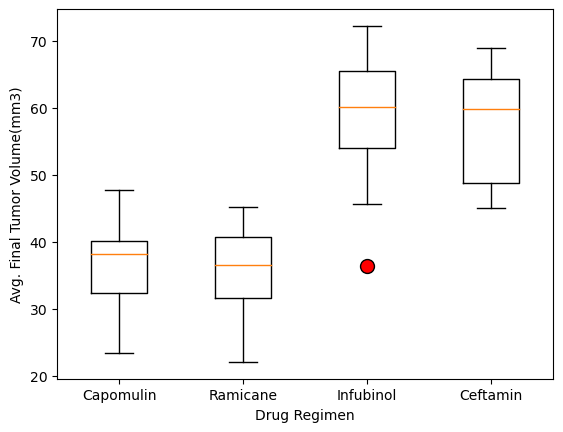

In [285]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax=plt.subplots()
outlier_color = dict(marker='o', markerfacecolor='red', markersize=10)
ax.boxplot(drug_tumor_vol_df, flierprops=outlier_color)
ax.set(
xlabel='Drug Regimen',
ylabel='Avg. Final Tumor Volume(mm3)',
xticklabels=treatments_list)

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse s185')

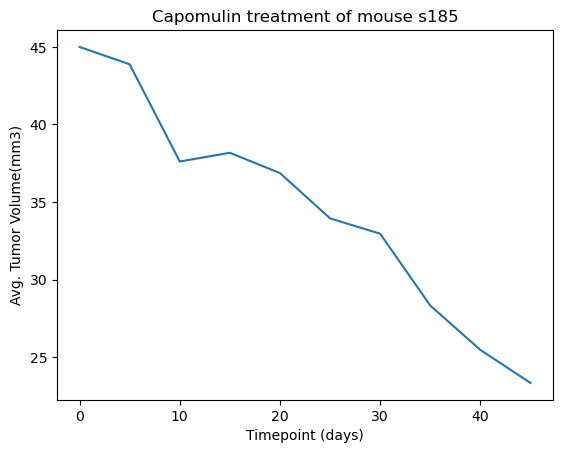

In [287]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_s185 = clean_data_df.loc[clean_data_df['Mouse ID'] == 's185',:]
#set index to timepoint
mouse_s185.set_index('Timepoint')
#plot line chart
plt.plot(mouse_s185['Timepoint'], mouse_s185['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Avg. Tumor Volume(mm3)')
plt.title("Capomulin treatment of mouse s185")

/var/folders/ms/5785_4z16zg_ss0mgzt1jx6c0000gq/T/ipykernel_19412/2769207901.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_cap_vol = capomulin_df.groupby(['Mouse ID']).mean()


<Axes: title={'center': 'Mouse weight vs. avg tumor volume(mm3)'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

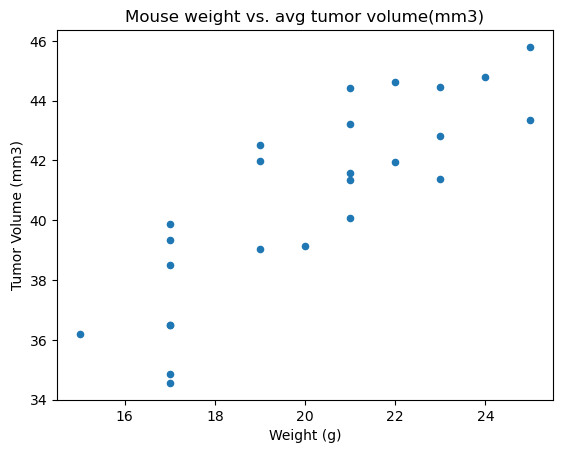

In [289]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#isolate capomulin data from combined dataframe
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
#slice capomulin data to have mouse ID as index and calculate average for all columns 
avg_cap_vol = capomulin_df.groupby(['Mouse ID']).mean()
avg_cap_vol
#plot mouse weight vs avg tumor volume
weight_v_tumorv = avg_cap_vol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",
                                   title="Mouse weight vs. avg tumor volume(mm3)")
weight_v_tumorv

## Correlation and Regression

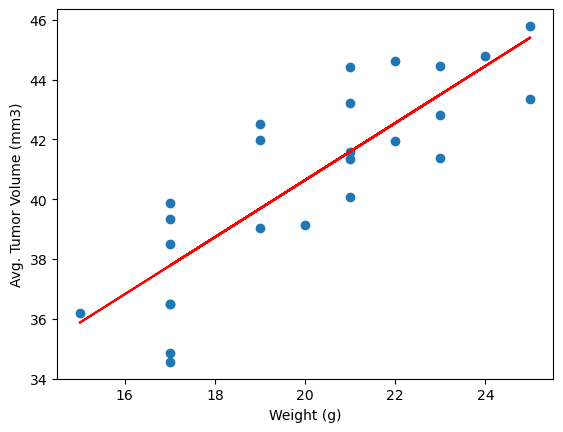

In [290]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#set x and y variables for linear regression analysis
weight_linreg = avg_cap_vol['Weight (g)']
tumor_vol_linreg = avg_cap_vol['Tumor Volume (mm3)']
#get linear regression stats from "linregress" function & set variable
linreg_stats = st.linregress(weight_linreg, tumor_vol_linreg)
#create line equation from stats calculated
vol_fit = linreg_stats.slope*weight_linreg + linreg_stats.intercept

#plot mouse weight vs avg tumor volume
plt.scatter(weight_linreg,tumor_vol_linreg)
#labels
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
#plot line of best fit
plt.plot(weight_linreg, vol_fit, "r")